In [1]:
import soundfile as sf
import numpy as np
from scipy.signal import lfilter
from pydub import AudioSegment
from pydub import AudioSegment
from pydub.playback import play
import pygame
import time

def obtener_duracion_audio(ruta_archivo):
    audio = AudioSegment.from_file(ruta_archivo)
    duracion_ms = len(audio)
    duracion_seg = duracion_ms / 1000
    return duracion_seg

def calculate_snr(audio):
    audio, sample_rate = sf.read(audio)
    signal_power = np.sum(audio ** 2)
    noise_power = np.sum(lfilter([1], [1, -0.99], audio) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

def calculate_thd(audio):
    try:
        audiop, sample_rate = sf.read(audio)
        if len(audiop) == 0:
            raise ValueError(f"The audio array is empty or the file format is not supported.")
        fundamental = np.max(audiop)
        harmonics = np.sqrt(np.sum(audiop ** 2)) - np.abs(fundamental)
        thd = 20 * np.log10(harmonics / fundamental)
        return thd
    except Exception as e:
        print(f"Error: {e}")
        return -1  

def promedio_potencia(audio_path):
    audio, sample_rate = sf.read(audio_path)
    energy = np.sum(audio ** 2) / len(audio)
    pms = 10 * np.log10(energy)
    return pms


def nivel_peak(audio_path):
    try:
        audio, sr = sf.read(audio_path)
        if len(audio) == 0:
            raise ValueError(f"The audio array is empty or the file format is not supported.")
        peak = 20 * np.log10(np.max(np.abs(audio)))
        return peak
    except Exception as e:
        print(f"Error: {e}")
        return None

    # Calcular la relación señal a ruido (SNR)
    #snr = calculate_snr(audio)
    # Calcular la distorsión armónica total (THD)
    #thd = calculate_thd(audio)
    # Imprimir los resultados
    #print("Promedio de nivel de potencia (PMS): ", pms)
    #print("Nivel de pico: ", peak)
    #print("Relación señal a ruido (SNR): ", snr)
    #print("Distorsión armónica total (THD): ", thd)

pygame 2.4.0 (SDL 2.26.4, Python 3.8.16)
Hello from the pygame community. https://www.pygame.org/contribute.html


C:\ProgramData\Anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
def evaluar_audio(a):
    if calculate_snr(a)>-3: 
        return False
    if calculate_thd(a)<29:
        return False
    if promedio_potencia(a)<-53:
        return False
    if nivel_peak(a)<-35:
        return False
    if obtener_duracion_audio(a)< 0.8:
        return False
    return True

In [3]:
import os
directorio_inicial1 = r"D:\sentirobots\Datasets\AffWild2\Audios_AffWild2\Seleccion"
archivos1=[]
duracion_a=[]
pasa=[]
pic=[]
mean_pot=[]
relacion_sr=[]
distorcion_armonicaT=[]
archi=[]
for raiz, carpetas, archivos_en_carpeta in os.walk(directorio_inicial1):
    for archivo in archivos_en_carpeta:
        archi.append(archivo)
        if os.path.isfile(os.path.join(raiz, archivo)):
            ruta_completa1 = os.path.join(raiz, archivo)
            archivos1.append(ruta_completa1)
            duracion = obtener_duracion_audio(ruta_completa1)
            prom_pot = promedio_potencia(ruta_completa1)
            peak = nivel_peak(ruta_completa1)
            rsr= calculate_snr(ruta_completa1)
            dat=calculate_thd(ruta_completa1)
            mean_pot.append(prom_pot)
            pic.append(peak)
            relacion_sr.append(rsr)
            distorcion_armonicaT.append(dat)
            duracion_a.append(duracion)
            if(evaluar_audio(ruta_completa1)):
                pasa.append(1)
            else:
                pasa.append(0)


C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_17660\3832519256.py:49: RuntimeWarning: invalid value encountered in scalar divide
  energy = np.sum(audio ** 2) / len(audio)
C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_17660\3832519256.py:27: RuntimeWarning: invalid value encountered in scalar divide
  snr = 10 * np.log10(signal_power / noise_power)


Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or the file format is not supported.
Error: The audio array is empty or

C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_17660\3832519256.py:52: RuntimeWarning: divide by zero encountered in log10
  pms = 10 * np.log10(energy)
C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_17660\3832519256.py:62: RuntimeWarning: divide by zero encountered in log10
  peak = 20 * np.log10(np.max(np.abs(audio)))
C:\Users\Desarrollo\AppData\Local\Temp\ipykernel_17660\3832519256.py:38: RuntimeWarning: invalid value encountered in scalar divide
  thd = 20 * np.log10(harmonics / fundamental)

KeyboardInterrupt



In [2]:
import pandas as pd
#Real
archiv={"RutaArchivo": archivos1}
df= pd.DataFrame(archiv)
df["Nombre archivo"] = archi
df["duracion"] = duracion_a
df["Promedio level pot"] = mean_pot
df["Nivel peak"] = pic
df["Distorsión armónica total"] = distorcion_armonicaT
df["Relación señal a ruido"] = relacion_sr
df["Filtro"] = pasa
df

NameError: name 'archivos1' is not defined

In [17]:
# Evaluar si los valores de las columnas cumplen con la condición utilizando un OR
condicion1 = df['duracion'] < 0.8
condicion2 = df['Promedio level pot'] <-53
condicion3 = df['Nivel peak'] <-35
condicion4 = df['Distorsión armónica total']<29
condicion5 = df['Relación señal a ruido'] > -3

# Contar cuántas columnas cumplen con las condiciones para cada fila
df['Falla en'] = pd.concat([condicion1, condicion2, condicion3, condicion4, condicion5], axis=1).sum(axis=1)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
0,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_1.wav,5.0,-21.327148,-6.677271,31.132925,-24.404155,1,0
1,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_11.wav,5.0,-22.338631,-8.920077,32.734259,-7.987095,1,0
2,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_13.wav,5.0,-21.901210,-7.658042,31.550654,-8.585075,1,0
3,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_15.wav,5.0,-23.111508,-7.487532,30.130167,-9.756408,1,0
4,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_17.wav,5.0,-22.912567,-7.487532,30.335233,-9.642979,1,0
...,...,...,...,...,...,...,...,...,...
7956,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video94_1.wav,5.0,-inf,-inf,NaN,NaN,0,2
7957,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_1.wav,5.0,-18.244823,-3.731625,31.648335,-10.441529,1,0
7958,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_3.wav,5.0,-17.164430,-3.731625,32.755260,-9.845363,1,0
7959,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_5.wav,5.0,-16.549656,-3.731625,33.740358,-8.138556,1,0


In [18]:
conteo = df['Filtro'].value_counts()
print(conteo)

0    5065
1    2896
Name: Filtro, dtype: int64


In [19]:
df_fallas = df[df['Filtro'] == 0].copy()
df_buenas = df[df['Filtro'] == 1].copy()

In [20]:
df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,7961.000000,7871.000000,7871.000000,7935.000000,7845.000000,7961.000000,7961.000000
mean,4.938241,-inf,-inf,27.599461,-12.229745,0.363773,0.685341
std,0.542753,NaN,NaN,4.683681,5.905548,0.481115,0.567634
min,0.000000,-inf,-inf,-1.000000,-39.983820,0.000000,0.000000
25%,5.000000,-31.850325,-13.122629,25.816165,-14.735581,0.000000,0.000000
50%,5.000000,-26.072295,-7.383957,28.128682,-11.316854,0.000000,1.000000
75%,5.000000,-20.970448,-2.715820,30.229834,-8.570880,1.000000,1.000000
max,5.000000,-8.082195,0.000000,45.977062,1.481090,1.000000,4.000000


In [23]:
duracion_df = df_fallas[df_fallas['duracion'] < 0.8].copy()
conteos = duracion_df['Filtro'].value_counts()
print(conteos)
duracion_df

0    92
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
739,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,116_85.wav,0.0,NaN,NaN,-1.0,NaN,0,2
740,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,116_87.wav,0.0,NaN,NaN,-1.0,NaN,0,2
741,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,116_89.wav,0.0,NaN,NaN,-1.0,NaN,0,2
743,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,116_91.wav,0.0,NaN,NaN,-1.0,NaN,0,2
744,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,116_93.wav,0.0,NaN,NaN,-1.0,NaN,0,2
...,...,...,...,...,...,...,...,...,...
7617,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video2_92.wav,0.0,NaN,NaN,-1.0,NaN,0,2
7618,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video2_94.wav,0.0,NaN,NaN,-1.0,NaN,0,2
7619,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video2_95.wav,0.0,NaN,NaN,-1.0,NaN,0,2
7620,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video2_97.wav,0.0,NaN,NaN,-1.0,NaN,0,2


In [24]:
duracion_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,92.000000,2.000000,2.000000,92.000000,2.000000,92.0,92.000000
mean,0.009054,-56.170175,-43.661075,-0.516121,-25.022199,0.0,2.032609
std,0.069481,5.739240,8.685826,3.264820,10.453158,0.0,0.232099
min,0.000000,-60.228430,-49.802881,-1.000000,-32.413698,0.0,2.000000
25%,0.000000,-58.199302,-46.731978,-1.000000,-28.717948,0.0,2.000000
50%,0.000000,-56.170175,-43.661075,-1.000000,-25.022199,0.0,2.000000
75%,0.000000,-54.141047,-40.590172,-1.000000,-21.326449,0.0,2.000000
max,0.640000,-52.111919,-37.519269,21.822988,-17.630700,0.0,4.000000


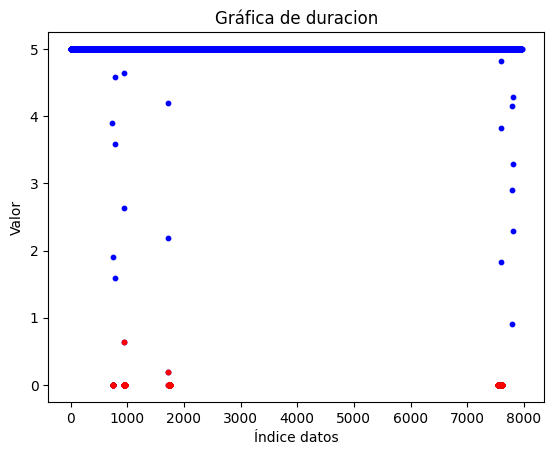

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

column_data = df['duracion']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de duracion')
mask = column_data < 0.8
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [26]:
# from pydub import AudioSegment
# from pydub.playback import play
# import pygame
# import time

# lista = duracion_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     time.sleep(5)
#     pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(5)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [27]:
pot_df = df_fallas[df_fallas['Promedio level pot'] <-53].copy()
conteosp = pot_df['Filtro'].value_counts()
print(conteosp)
pot_df

0    130
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
403,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_1.wav,5.000,-90.361100,-90.308999,45.924698,-39.983624,0,2
404,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_2.wav,5.000,-90.308999,-90.308999,45.977062,-39.983820,0,2
405,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_4.wav,5.000,-90.308999,-90.308999,45.977062,-39.983820,0,2
406,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_5.wav,5.000,-90.308999,-90.308999,45.977062,-39.983820,0,2
407,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_7.wav,5.000,-90.308999,-90.308999,45.977062,-39.983820,0,2
...,...,...,...,...,...,...,...,...,...
7794,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video66_2.wav,4.156,-inf,-inf,NaN,NaN,0,2
7813,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video72_1.wav,4.284,-inf,-inf,NaN,NaN,0,2
7814,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video72_2.wav,3.284,-inf,-inf,NaN,NaN,0,2
7815,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video72_3.wav,2.284,-inf,-inf,NaN,NaN,0,2


In [28]:
pot_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,130.000000,130.000000,130.000000,104.000000,104.000000,130.0,130.000000
mean,4.916931,-inf,-inf,26.461065,-18.004675,0.0,2.238462
std,0.511545,NaN,NaN,7.171795,9.050117,0.0,0.445544
min,0.193000,-inf,-inf,8.313523,-39.983820,0.0,2.000000
25%,5.000000,-79.758283,-65.955516,22.888519,-22.079653,0.0,2.000000
50%,5.000000,-57.697700,-39.717835,25.430482,-15.840543,0.0,2.000000
75%,5.000000,-55.210368,-34.010735,29.962450,-13.081512,0.0,2.000000
max,5.000000,-53.022274,-22.426973,45.977062,1.070924,0.0,4.000000


In [29]:
# lista = pot_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

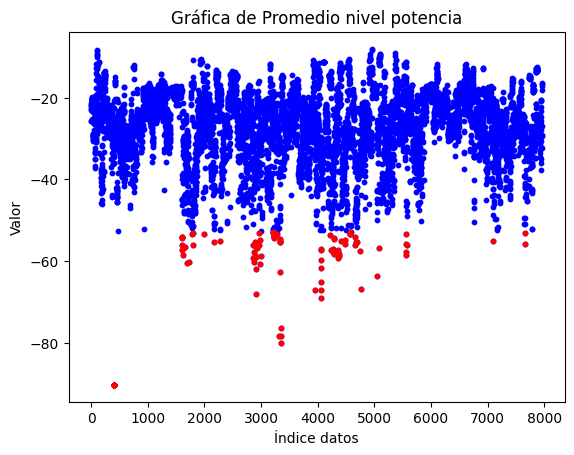

In [30]:
column_data = df['Promedio level pot']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Promedio nivel potencia')
mask = column_data <-53
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [31]:
peak_df = df_fallas[df_fallas['Nivel peak'] <-35].copy()
conteospp = peak_df['Filtro'].value_counts()
print(conteospp)
peak_df

0    98
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
403,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_1.wav,5.000,-90.361100,-90.308999,45.924698,-39.983624,0,2
404,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_2.wav,5.000,-90.308999,-90.308999,45.977062,-39.983820,0,2
405,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_4.wav,5.000,-90.308999,-90.308999,45.977062,-39.983820,0,2
406,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_5.wav,5.000,-90.308999,-90.308999,45.977062,-39.983820,0,2
407,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,111-25-1920x1080_7.wav,5.000,-90.308999,-90.308999,45.977062,-39.983820,0,2
...,...,...,...,...,...,...,...,...,...
7794,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video66_2.wav,4.156,-inf,-inf,NaN,NaN,0,2
7813,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video72_1.wav,4.284,-inf,-inf,NaN,NaN,0,2
7814,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video72_2.wav,3.284,-inf,-inf,NaN,NaN,0,2
7815,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video72_3.wav,2.284,-inf,-inf,NaN,NaN,0,2


In [32]:
peak_df.describe()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,98.000000,98.000000,98.000000,72.000000,72.000000,98.0,98.000000
mean,4.845316,-inf,-inf,29.874421,-21.095473,0.0,2.193878
std,0.727361,NaN,NaN,6.918683,9.433043,0.0,0.636650
min,0.193000,-inf,-inf,13.372430,-39.983820,0.0,1.000000
25%,5.000000,NaN,NaN,26.479593,-24.433083,0.0,2.000000
50%,5.000000,-59.761000,-40.753083,29.826864,-19.019618,0.0,2.000000
75%,5.000000,-55.237872,-38.628976,32.759970,-14.337597,0.0,3.000000
max,5.000000,-48.800086,-35.454496,45.977062,-5.195859,0.0,4.000000


In [33]:
# lista = peak_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

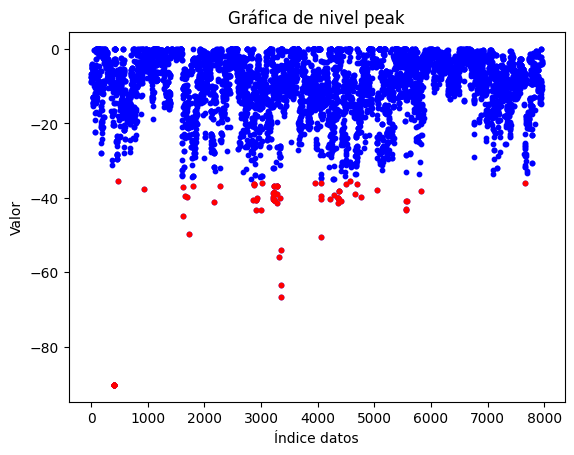

In [34]:
column_data = df['Nivel peak']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de nivel peak')
mask = column_data <-35
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [35]:
dis_df = df_fallas[df_fallas['Distorsión armónica total'] <29].copy()
conteosppd = dis_df['Filtro'].value_counts()
print(conteosppd)
dis_df

0    4855
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
5,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_19.wav,5.0,-25.846619,-8.795870,28.654953,-9.259816,0,1
7,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_21.wav,5.0,-25.793947,-8.736238,28.647736,-8.906553,0,1
8,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_23.wav,5.0,-25.808590,-8.736238,28.632551,-8.949162,0,1
9,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_25.wav,5.0,-25.205193,-6.463226,26.894529,-23.602756,0,1
18,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_41.wav,5.0,-21.261981,-4.435120,28.886997,-25.647036,0,1
...,...,...,...,...,...,...,...,...,...
7949,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video8_56.wav,5.0,-29.564903,-11.244439,27.334614,-13.421968,0,1
7952,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_1.wav,5.0,-26.951407,-3.323837,21.707233,-5.291675,0,1
7953,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_3.wav,5.0,-29.124429,-3.323837,19.328962,-2.810971,0,2
7954,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_5.wav,5.0,-32.458047,-10.005997,24.245541,-2.892400,0,2


In [36]:
dis_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,4855.000000,4765.000000,4765.000000,4855.000000,4765.000000,4855.0,4855.000000
mean,4.900695,-29.424647,-9.216738,25.324976,-11.606827,0.0,1.068589
std,0.690164,8.306186,7.663324,4.514779,5.167326,0.0,0.278379
min,0.000000,-78.298812,-55.823481,-1.000000,-38.836038,0.0,1.000000
25%,5.000000,-33.748302,-12.886885,24.475764,-13.948268,0.0,1.000000
50%,5.000000,-27.741563,-7.525906,26.357605,-10.897319,0.0,1.000000
75%,5.000000,-23.395876,-3.385070,27.763760,-8.463197,0.0,1.000000
max,5.000000,-16.801516,0.000000,28.998437,1.481090,0.0,4.000000


In [37]:
# lista = dis_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

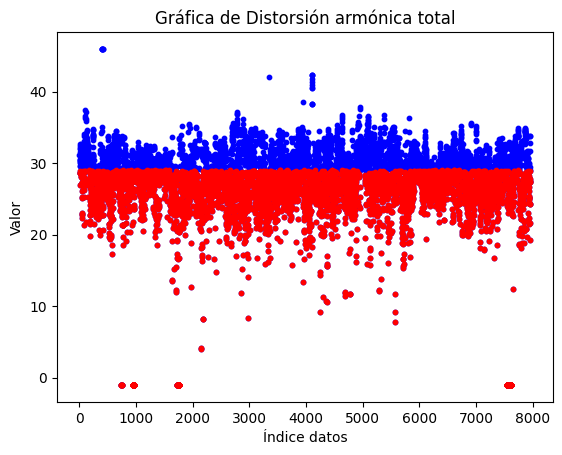

In [38]:
column_data = df['Distorsión armónica total']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Distorsión armónica total')
mask = column_data <29
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [39]:
rsr_df = df_fallas[df_fallas['Relación señal a ruido'] > -3].copy()
conteosppde = rsr_df['Filtro'].value_counts()
print(conteosppde)
rsr_df

0    281
Name: Filtro, dtype: int64


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
208,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,105_45.wav,5.0,-24.108304,-8.539189,30.979458,-1.264180,0,1
209,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,105_47.wav,5.0,-25.622613,-9.309142,29.418288,-2.035628,0,1
210,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,105_49.wav,5.0,-28.120373,-11.796570,29.648360,-2.134701,0,1
212,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,105_51.wav,5.0,-27.831467,-12.167224,30.789107,-1.916970,0,1
216,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,105_59.wav,5.0,-25.629539,-9.966662,30.090051,-1.470043,0,1
...,...,...,...,...,...,...,...,...,...
7786,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video4_5.wav,5.0,-31.336830,-9.502491,23.698593,-2.409866,0,2
7787,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video4_6.wav,5.0,-32.767284,-9.502491,22.165962,-2.453636,0,2
7788,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video4_7.wav,5.0,-32.757193,-9.502491,22.176839,-2.527804,0,2
7953,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_3.wav,5.0,-29.124429,-3.323837,19.328962,-2.810971,0,2


In [40]:
rsr_df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
count,281.000000,281.000000,281.000000,281.000000,281.000000,281.0,281.000000
mean,4.982616,-27.847249,-9.681069,27.846282,-1.588159,0.0,1.505338
std,0.202983,8.380088,7.459589,3.813801,1.050400,0.0,0.514927
min,1.825000,-55.944429,-34.077499,11.756757,-2.996850,0.0,1.000000
25%,5.000000,-33.105933,-14.211224,25.791111,-2.445106,0.0,1.000000
50%,5.000000,-27.078234,-9.040080,29.009295,-1.817130,0.0,1.000000
75%,5.000000,-19.623730,-3.323837,30.502530,-1.076088,0.0,2.000000
max,5.000000,-13.679009,0.000000,34.650207,1.481090,0.0,3.000000


In [41]:
# lista = rsr_df['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#  #   time.sleep(5)
#   #  pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()
# #
#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()

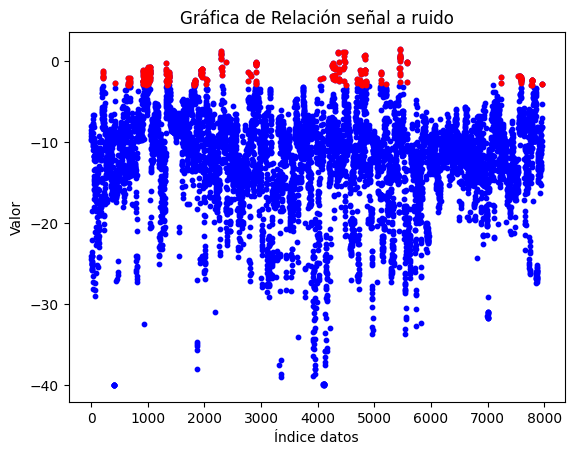

In [42]:
column_data = df['Relación señal a ruido']
plt.scatter(range(len(column_data)), column_data, s=10, color='blue')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Relación señal a ruido')
mask = column_data > -3
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='red')
plt.show()

In [43]:
# lista = df_fallas['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     #time.sleep(5)
#     #pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [44]:
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
5,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_19.wav,5.0,-25.846619,-8.795870,28.654953,-9.259816,0,1
7,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_21.wav,5.0,-25.793947,-8.736238,28.647736,-8.906553,0,1
8,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_23.wav,5.0,-25.808590,-8.736238,28.632551,-8.949162,0,1
9,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_25.wav,5.0,-25.205193,-6.463226,26.894529,-23.602756,0,1
18,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_41.wav,5.0,-21.261981,-4.435120,28.886997,-25.647036,0,1
...,...,...,...,...,...,...,...,...,...
7952,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_1.wav,5.0,-26.951407,-3.323837,21.707233,-5.291675,0,1
7953,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_3.wav,5.0,-29.124429,-3.323837,19.328962,-2.810971,0,2
7954,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_5.wav,5.0,-32.458047,-10.005997,24.245541,-2.892400,0,2
7955,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_7.wav,5.0,-29.361957,-10.642789,27.578487,-8.175768,0,1


In [45]:
df_buenas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
0,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_1.wav,5.0,-21.327148,-6.677271,31.132925,-24.404155,1,0
1,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_11.wav,5.0,-22.338631,-8.920077,32.734259,-7.987095,1,0
2,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_13.wav,5.0,-21.901210,-7.658042,31.550654,-8.585075,1,0
3,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_15.wav,5.0,-23.111508,-7.487532,30.130167,-9.756408,1,0
4,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_17.wav,5.0,-22.912567,-7.487532,30.335233,-9.642979,1,0
...,...,...,...,...,...,...,...,...,...
7951,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video8_8.wav,5.0,-26.888524,-10.640984,29.486439,-11.386378,1,0
7957,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_1.wav,5.0,-18.244823,-3.731625,31.648335,-10.441529,1,0
7958,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_3.wav,5.0,-17.164430,-3.731625,32.755260,-9.845363,1,0
7959,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_5.wav,5.0,-16.549656,-3.731625,33.740358,-8.138556,1,0


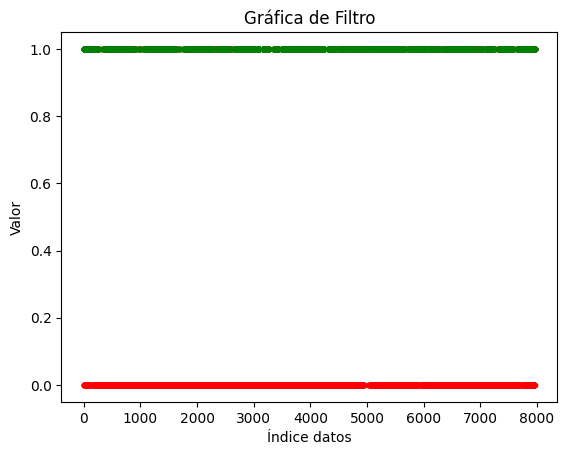

In [46]:
column_data = df['Filtro']
plt.scatter(range(len(column_data)), column_data, s=10, color='red')
plt.xlabel('Índice datos')
plt.ylabel('Valor')
plt.title('Gráfica de Filtro')
mask = column_data > 0
plt.scatter(np.where(mask)[0], column_data[mask], s=10, color='green')
plt.show()

In [47]:
condicion = (df_fallas['Falla en'] <= 1) & (df_fallas['Relación señal a ruido'] <= -3)
df_fallas['Filtro2'] = condicion.astype(int)
df_fallas.loc[condicion, 'Filtro2'] = 1
df_fallas

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
5,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_19.wav,5.0,-25.846619,-8.795870,28.654953,-9.259816,0,1,1
7,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_21.wav,5.0,-25.793947,-8.736238,28.647736,-8.906553,0,1,1
8,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_23.wav,5.0,-25.808590,-8.736238,28.632551,-8.949162,0,1,1
9,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_25.wav,5.0,-25.205193,-6.463226,26.894529,-23.602756,0,1,1
18,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_41.wav,5.0,-21.261981,-4.435120,28.886997,-25.647036,0,1,1
...,...,...,...,...,...,...,...,...,...,...
7952,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_1.wav,5.0,-26.951407,-3.323837,21.707233,-5.291675,0,1,1
7953,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_3.wav,5.0,-29.124429,-3.323837,19.328962,-2.810971,0,2,0
7954,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_5.wav,5.0,-32.458047,-10.005997,24.245541,-2.892400,0,2,0
7955,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video93_7.wav,5.0,-29.361957,-10.642789,27.578487,-8.175768,0,1,1


In [48]:
contars = df_fallas['Filtro2'].value_counts()
print(contars)

1    4565
0     500
Name: Filtro2, dtype: int64


In [49]:
df_fallas2 = df_fallas[df_fallas['Filtro2'] == 0].copy()
df_buenas2 = df_fallas[df_fallas['Filtro2'] == 1].copy()

In [50]:
# lista = df_fallas2['RutaArchivo'].tolist()

# pygame.init()
# pygame.mixer.init()

# for audio_path in lista:
#     # Cargar el archivo de audio
#     audio = AudioSegment.from_file(audio_path)

#     # Reproducir el audio
#     pygame.mixer.music.load(audio_path)
#     pygame.mixer.music.play()

#     # Mostrar el nombre del archivo que se está reproduciendo
#     print("Reproduciendo:", audio_path)

#     # Pausar la reproducción durante 5 segundos
#     #time.sleep(5)
#     #pygame.mixer.music.pause()

#     # Esperar 2 segundos
#     time.sleep(2)

#     # Reanudar la reproducción
#     pygame.mixer.music.unpause()

#     # Esperar 5 segundos antes de reproducir el siguiente archivo
#     time.sleep(1)

# # Detener la reproducción al finalizar
# pygame.mixer.music.stop()
# pygame.quit()

In [51]:
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en
0,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_1.wav,5.0,-21.327148,-6.677271,31.132925,-24.404155,1,0
1,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_11.wav,5.0,-22.338631,-8.920077,32.734259,-7.987095,1,0
2,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_13.wav,5.0,-21.901210,-7.658042,31.550654,-8.585075,1,0
3,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_15.wav,5.0,-23.111508,-7.487532,30.130167,-9.756408,1,0
4,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_17.wav,5.0,-22.912567,-7.487532,30.335233,-9.642979,1,0
...,...,...,...,...,...,...,...,...,...
7956,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video94_1.wav,5.0,-inf,-inf,NaN,NaN,0,2
7957,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_1.wav,5.0,-18.244823,-3.731625,31.648335,-10.441529,1,0
7958,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_3.wav,5.0,-17.164430,-3.731625,32.755260,-9.845363,1,0
7959,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_5.wav,5.0,-16.549656,-3.731625,33.740358,-8.138556,1,0


In [52]:
condi = (df['Falla en'] <= 1) & (df['Relación señal a ruido'] <= -3)
df['Filtro2'] = condi.astype(int)
df.loc[condi, 'Filtro2'] = 1
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
0,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_1.wav,5.0,-21.327148,-6.677271,31.132925,-24.404155,1,0,1
1,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_11.wav,5.0,-22.338631,-8.920077,32.734259,-7.987095,1,0,1
2,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_13.wav,5.0,-21.901210,-7.658042,31.550654,-8.585075,1,0,1
3,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_15.wav,5.0,-23.111508,-7.487532,30.130167,-9.756408,1,0,1
4,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_17.wav,5.0,-22.912567,-7.487532,30.335233,-9.642979,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7956,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video94_1.wav,5.0,-inf,-inf,NaN,NaN,0,2,0
7957,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_1.wav,5.0,-18.244823,-3.731625,31.648335,-10.441529,1,0,1
7958,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_3.wav,5.0,-17.164430,-3.731625,32.755260,-9.845363,1,0,1
7959,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_5.wav,5.0,-16.549656,-3.731625,33.740358,-8.138556,1,0,1


In [53]:
contars2 = df['Filtro2'].value_counts()
print(contars2)

1    7461
0     500
Name: Filtro2, dtype: int64


In [54]:
df.to_csv(r"D:\sentirobots\Datasets\AffWild2\Audios_AffWild2\filtro-audio-AffWild2.csv", index=False)
print("Se ha generado el archivo")

Se ha generado el archivo


In [55]:
df.describe()

,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
count,7961.000000,7871.000000,7871.000000,7935.000000,7845.000000,7961.000000,7961.000000,7961.000000
mean,4.938241,-inf,-inf,27.599461,-12.229745,0.363773,0.685341,0.937194
std,0.542753,NaN,NaN,4.683681,5.905548,0.481115,0.567634,0.242629
min,0.000000,-inf,-inf,-1.000000,-39.983820,0.000000,0.000000,0.000000
25%,5.000000,-31.850325,-13.122629,25.816165,-14.735581,0.000000,0.000000,1.000000
50%,5.000000,-26.072295,-7.383957,28.128682,-11.316854,0.000000,1.000000,1.000000
75%,5.000000,-20.970448,-2.715820,30.229834,-8.570880,1.000000,1.000000,1.000000
max,5.000000,-8.082195,0.000000,45.977062,1.481090,1.000000,4.000000,1.000000


## Transcripción 

In [1]:
import os
import pandas as pd
import librosa
from speechbrain.pretrained import EncoderDecoderASR
from tqdm import tqdm
import numpy as np
import torch

The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.
The torchaudio backend is switched to 'soundfile'. Note that 'sox_io' is not supported on Windows.


In [2]:
rutaa= r"D:\sentirobots\Datasets\AffWild2\Audios_AffWild2\filtro-audio-AffWild2.csv"
df = pd.read_csv(rutaa)
df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
0,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_1.wav,5.0,-21.327148,-6.677271,31.132925,-24.404155,1,0,1
1,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_11.wav,5.0,-22.338631,-8.920077,32.734259,-7.987095,1,0,1
2,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_13.wav,5.0,-21.901210,-7.658042,31.550654,-8.585075,1,0,1
3,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_15.wav,5.0,-23.111508,-7.487532,30.130167,-9.756408,1,0,1
4,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,1-30-1280x720_17.wav,5.0,-22.912567,-7.487532,30.335233,-9.642979,1,0,1
...,...,...,...,...,...,...,...,...,...,...
7956,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video94_1.wav,5.0,-inf,-inf,NaN,NaN,0,2,0
7957,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_1.wav,5.0,-18.244823,-3.731625,31.648335,-10.441529,1,0,1
7958,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_3.wav,5.0,-17.164430,-3.731625,32.755260,-9.845363,1,0,1
7959,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,video9_5.wav,5.0,-16.549656,-3.731625,33.740358,-8.138556,1,0,1


## SpeechBrain

In [3]:
# num_elementos = 1000
# copia_df = df.head(num_elementos).copy()
# copia_df

### Modificar por parte el inicio y el fin 

In [4]:
inicio = 6000
fin = 7000
copia_df = df.iloc[inicio:fin].copy()
copia_df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2
6000,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_32.wav,5.0,-16.971037,-0.746619,29.510336,-10.365932,1,0,1
6001,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_34.wav,5.0,-18.215289,-1.388202,29.592665,-11.293198,1,0,1
6002,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_36.wav,5.0,-20.099768,-1.388202,28.128268,-12.557572,0,1,1
6003,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_38.wav,5.0,-21.160178,-1.388202,31.158234,-12.520459,1,0,1
6004,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_4.wav,5.0,-17.581515,-0.009813,30.038544,-9.057221,1,0,1
...,...,...,...,...,...,...,...,...,...,...
6995,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_46.wav,5.0,-39.790587,-17.426138,25.319088,-20.307011,0,1,1
6996,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_6.wav,5.0,-35.653230,-18.638222,28.692011,-19.000449,0,1,1
6997,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_8.wav,5.0,-37.724585,-19.697322,27.640197,-19.753323,0,1,1
6998,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,82-25-854x480_1.wav,5.0,-29.978479,-19.311775,35.204322,-31.467845,1,0,1


In [5]:
model = EncoderDecoderASR.from_hparams(
    source="speechbrain/asr-transformer-transformerlm-librispeech",
    savedir="pretrained_models/asr-transformer-transformerlm-librispeech",
#    run_opts={'device':'cuda'},
)
sample_rate = 22400
max_time = 7.

texts = []

In [6]:
copia_df['Transcripcion'] = ''

for index, row in tqdm(copia_df[copia_df['Filtro2'] < 3].iterrows()):
    audiofile, _ = librosa.load(path=row['RutaArchivo'], sr=22400, duration=np.minimum(row['duracion'], 7.))

    if row['duracion'] < 7.:
        audiofile = librosa.util.pad_center(data=audiofile, size=22400*7)

    normalized = model.audio_normalizer(torch.tensor(audiofile), 22400)
    rel_length = torch.tensor([1.])
    predicted_words, _ = model.transcribe_batch(
        normalized.unsqueeze(0),
        rel_length,
    )

    normalized = normalized.detach()
    rel_length = rel_length.detach()
    torch.cuda.empty_cache()
    copia_df.at[index, 'Transcripcion'] = " ".join(predicted_words)

copia_df

0it [00:00, ?it/s]C:\Users\Desarrollo\AppData\Roaming\Python\Python38\site-packages\torch\functional.py:641: UserWarning: stft with return_complex=False is deprecated. In a future pytorch release, stft will return complex tensors for all inputs, and return_complex=False will raise an error.
Note: you can still call torch.view_as_real on the complex output to recover the old return format. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\SpectralOps.cpp:867.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore[attr-defined]
C:\Users\Desarrollo\AppData\Roaming\Python\Python38\site-packages\torch\nn\functional.py:4999: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
1000it [24:53:49, 89.63s/it]


,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion
6000,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_32.wav,5.0,-16.971037,-0.746619,29.510336,-10.365932,1,0,1,A LOT OF PEOPLE ONE YOUTH AND SWEAR WHAT'S THO...
6001,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_34.wav,5.0,-18.215289,-1.388202,29.592665,-11.293198,1,0,1,WITHOUT GETTING THE TROUBLES OF THE BEETLES DE...
6002,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_36.wav,5.0,-20.099768,-1.388202,28.128268,-12.557572,0,1,1,HEAVENLY HELP YOU ALL EVEN THOSE INCIDENTALLY ...
6003,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_38.wav,5.0,-21.160178,-1.388202,31.158234,-12.520459,1,0,1,ONLY THERE ARE MORE TINY BEAKERS THAN ENGLISH ...
6004,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_4.wav,5.0,-17.581515,-0.009813,30.038544,-9.057221,1,0,1,IT'S THE WORD THAT I WANT TO APOLOGISE FOR MY ...
...,...,...,...,...,...,...,...,...,...,...,...
6995,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_46.wav,5.0,-39.790587,-17.426138,25.319088,-20.307011,0,1,1,I KNOW IT IT DISTRESSED ME BUT YOU
6996,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_6.wav,5.0,-35.653230,-18.638222,28.692011,-19.000449,0,1,1,GREAT SO MADAME LEFT HER FOR ANOTHER MAN SHE I...
6997,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_8.wav,5.0,-37.724585,-19.697322,27.640197,-19.753323,0,1,1,I'VE LEFT HER FOR ANOTHER MAN SHE'S TOSSING PO...
6998,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,82-25-854x480_1.wav,5.0,-29.978479,-19.311775,35.204322,-31.467845,1,0,1,IMMIN IMMORBUT


In [7]:
copia_df

,RutaArchivo,Nombre archivo,duracion,Promedio level pot,Nivel peak,Distorsión armónica total,Relación señal a ruido,Filtro,Falla en,Filtro2,Transcripcion
6000,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_32.wav,5.0,-16.971037,-0.746619,29.510336,-10.365932,1,0,1,A LOT OF PEOPLE ONE YOUTH AND SWEAR WHAT'S THO...
6001,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_34.wav,5.0,-18.215289,-1.388202,29.592665,-11.293198,1,0,1,WITHOUT GETTING THE TROUBLES OF THE BEETLES DE...
6002,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_36.wav,5.0,-20.099768,-1.388202,28.128268,-12.557572,0,1,1,HEAVENLY HELP YOU ALL EVEN THOSE INCIDENTALLY ...
6003,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_38.wav,5.0,-21.160178,-1.388202,31.158234,-12.520459,1,0,1,ONLY THERE ARE MORE TINY BEAKERS THAN ENGLISH ...
6004,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,59-30-1280x720_4.wav,5.0,-17.581515,-0.009813,30.038544,-9.057221,1,0,1,IT'S THE WORD THAT I WANT TO APOLOGISE FOR MY ...
...,...,...,...,...,...,...,...,...,...,...,...
6995,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_46.wav,5.0,-39.790587,-17.426138,25.319088,-20.307011,0,1,1,I KNOW IT IT DISTRESSED ME BUT YOU
6996,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_6.wav,5.0,-35.653230,-18.638222,28.692011,-19.000449,0,1,1,GREAT SO MADAME LEFT HER FOR ANOTHER MAN SHE I...
6997,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,81-30-576x360_8.wav,5.0,-37.724585,-19.697322,27.640197,-19.753323,0,1,1,I'VE LEFT HER FOR ANOTHER MAN SHE'S TOSSING PO...
6998,D:\sentirobots\Datasets\AffWild2\Audios_AffWil...,82-25-854x480_1.wav,5.0,-29.978479,-19.311775,35.204322,-31.467845,1,0,1,IMMIN IMMORBUT


In [8]:
columna = "Transcripcion"
num_vacios = copia_df[columna].eq('').sum()
total_registros = copia_df[columna].shape[0]
porcentaje_vacios = (num_vacios / total_registros) * 100

print("Número de valores vacíos en la columna {}: {}".format(columna, num_vacios))
print("Total de registros en la columna {}: {}".format(columna, total_registros))
print("Porcentaje de valores vacíos en la columna {}: {:.2f}%".format(columna, porcentaje_vacios))

Número de valores vacíos en la columna Transcripcion: 0
Total de registros en la columna Transcripcion: 1000
Porcentaje de valores vacíos en la columna Transcripcion: 0.00%


### MODIFICAR CSV POR PARTE

In [9]:
copia_df.to_csv(r'D:\sentirobots\Datasets\AffWild2\Audios_AffWild2\Transcripcion-AffWild2-Parte7.csv', index=False)
print("Realizado")

Realizado
